<a href="https://colab.research.google.com/github/ssssihoon/WE_IT/blob/main/Data_analysis/14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#통계 분석 기법을 이용한 가설 검정

통계 분석의 종류

1. 기술 통계 : 데이터를 요약해 설명하는 통계 분석 기법

2. 추론 통계 : 어떤 값이 발생할 확률을 계산하는 통계 분석 기법

통계적 가설 검정

유의확률을 이용해 가설을 검정하는 방법을 통계적 가설검정이라 한다.

유의확률 : 실제로는 집단 간 차이가 없는데 우연히 차이가 있는 데이터가 추출될 확률

## t검정

두 집단의 평균에 통계적으로 유의한 차이가 있는지 알아볼 때 사용하는 통계 분석 기법

우연으로 일어난 일인 것인가?실제로 일어난 것인가? 검정을 통해 실제로 일어난 일이라면 신뢰성을 확보할 수 있다.

두 집단의 평균 비교하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
mpg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WE_IT_DATA_ANALYSIS/mpg.csv")

In [3]:
mpg.query('category in ["compact", "suv"]').groupby('category', as_index = False).agg(n = ('category', 'count'), mean = ('cty', 'mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [4]:
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']

scipy 패키지의 ttest_ind()를 이용해 t검정

In [5]:
# t 검정
from scipy import stats
stats.ttest_ind(compact, suv, equal_var = True) # equar_var = True : 집단 간 분산이 같다는 가정을 대입

TtestResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21, df=107.0)

pvalue= -> 유의확률을 의미한다.

0.05 미만이라면 유의하다고 해석한다.

값이 2.3~ * e-21 -> 2.3 * 10^-21 => 0.05미만 ''' 유의하다.라는 결론 도출

일반 휘발유(r)와 고급 휘발유(p)의 도시 연비 t 검정

In [6]:
# 기술 통계 분석
mpg.query('fl in ["r", "p"]').groupby('fl', as_index = False).agg(n = ('fl', 'count'), mean = ('cty', 'mean'))

,fl,n,mean
0,p,52,17.365385
1,r,168,16.738095


In [7]:
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

# t검정
stats.ttest_ind(regular, premium, equal_var = True)

TtestResult(statistic=-1.066182514588919, pvalue=0.28752051088667036, df=218.0)

0.28 > 0.05 이므로 우연히 발생했을 가능성이 크다.

##상관분석 - 두 변수의 관계 분석

상관분석은 두 연속 변수가 서로 관련이 있는지 검정하는 통계 분석 기법이다.

상관분석으로 도출한 상관계수를 보면 두 변수가 얼마나 관련되어 있는지, 관련성의 정도를 파악할 수 있다.

1에 가까울 수록 관련성이 크다. 양수면 비례, 음수면 반비례

enonomics df, unemploy : 실업자 수 , pce : 개인 소비 지출

df.corr() -> 상관행렬을 만들 수 있다.

상관 행렬을 만든 후 상관계수 구하기

In [8]:
economics = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WE_IT_DATA_ANALYSIS/economics.csv")

# 상관행렬 만들기
economics[['unemploy', 'pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


유의 확률 구하기

stats.pearsonr()

In [9]:
stats.pearsonr(economics['unemploy'], economics['pce'])

PearsonRResult(statistic=0.614517614193208, pvalue=6.773527303289964e-61)

유의 확률이 0.05미만이다.

###상관행렬 히트맵 만들기

상관행렬 만들기

In [10]:
mtcars = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WE_IT_DATA_ANALYSIS/mtcars.csv")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
car_cor = mtcars.corr() # 상관행렬 만들기
car_cor = round(car_cor, 2)
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


mpg : 연비, cyl : 실린더 수, wt : 무게

상관행렬 해석 :      

cyl열의 mpg행을 보면 값이 -0.85이다. 이것은 연비가 높을수록 실린더 수가 적은 경향이 있다 라는 것을 알 수 있다.



히트맵 만들기

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '120',  # 해상도
                     'figure.figsize' : [7.5, 5.5]}) # 가로 세로 크기 설정

<Axes: >

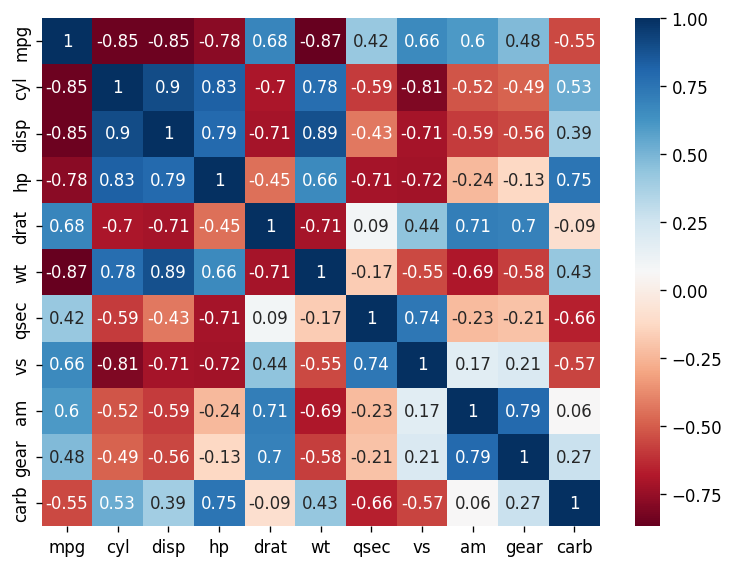

In [13]:
# 히트맵
import seaborn as sns
sns.heatmap(car_cor,
            annot = True, # 상관계수 표기
            cmap = 'RdBu') #컬러맵

대각행렬 제거하기

In [15]:
# mask 만들기 - 상관관계만큼 0으로 배열
import numpy as np
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
# np.triu_indices_from()으로 오른쪽 위 대각 행렬을 1로
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<Axes: >

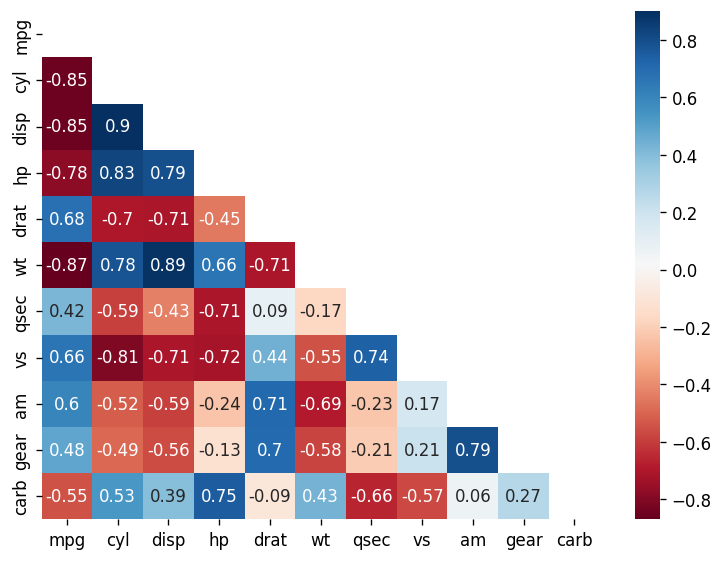

In [17]:
# 히트맵에 mask 적용
sns.heatmap(data = car_cor,
            annot = True,
            cmap = 'RdBu',
            mask = mask)

<Axes: >

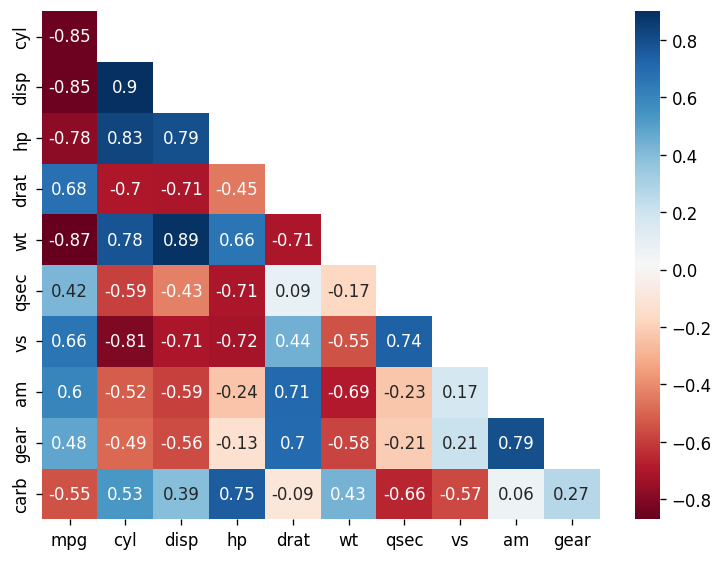

In [21]:
# 빈 행과 열 제거해서 깔끔하게 만들기
mask_new = mask[1:, :-1]
cor_new = car_cor.iloc[1:, :-1]

#히트맵
sns.heatmap(data = cor_new,
            annot = True,
            cmap = 'RdBu',
            mask = mask_new)

<Axes: >

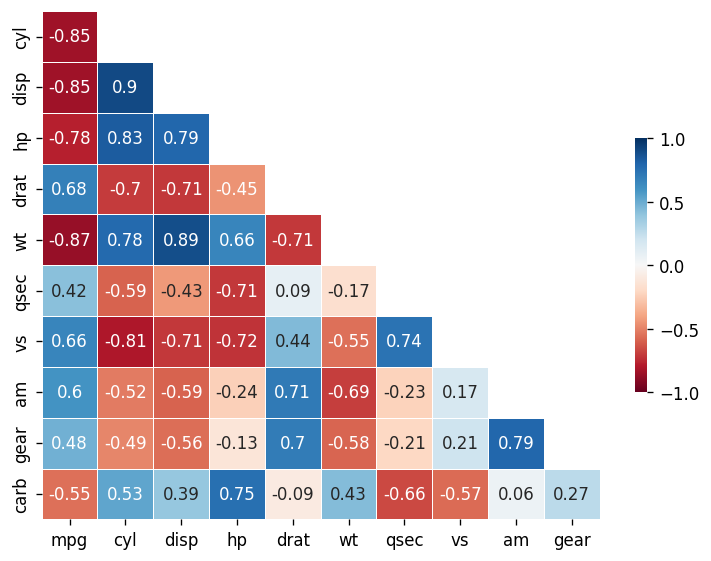

In [23]:
#파라미터를 추가해 히트맵을 보기좋게

sns.heatmap(data = cor_new,
            annot = True,
            cmap = 'RdBu',
            mask = mask_new,
            linewidths = .5,
            vmax = 1,
            vmin = -1,
            cbar_kws = {"shrink" : .5})